# Stream Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import data_table
data_table.enable_dataframe_formatter()

## Original File

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Stream_Analysis/Cleaned/SJ_Competitive Analysis_ Watching Live - Competitive Analysis.csv')
df

,Unnamed: 0,Hulu,Youtube TV,Fubo,Peacock,Paramount +,Sling,Philo,Pluto,NBC,FOX,ABC,CBS,Unnamed: 13,D+/EMEA,Unnamed: 15
0,1. Live player,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Player control to Pause/Resume Play,True,True,True,False,False,True,True,False,True,False,True,False,NaN,True,NaN
2,Jump to live (after pause/play),True,True,True,False,False,True,True,False,False,False,False,False,NaN,False,NaN
3,Start from the beginning (start over),True,True,True,False,False,False,True,False,False,True,False,False,NaN,False,NaN
4,Live RW/FF,True,True,True,False,False,True,False,False,False,False,True,False,NaN,False,NaN
5,Short description available whin the player,False,False,False,True,False,False,False,True,False,True,True,False,NaN,False,NaN
6,Recording DVR within the player,False,False,True,False,False,True,False,False,False,False,False,False,NaN,False,NaN
7,Playing ‘Live’ automatically by default,True,False,False,True,False,False,False,True,False,False,True,False,NaN,False,NaN
8,Minimized player: Picture in a Picture (PIP),True,False,True,False,False,False,True,True,False,False,False,False,NaN,False,
9,Add to My List or Favorite from player,False,False,True,False,False,False,False,False,False,True,False,False,NaN,False,NaN


## Live Player

### Accessing the content file

In [ ]:
df_player = pd.read_csv('/content/drive/MyDrive/Stream_Analysis/Cleaned/C-Live_Player.csv')
df_player

,Features,Hulu,Youtube TV,Fubo,Peacock,Paramount +,Sling,Philo,Pluto,NBC,FOX,ABC,CBS,Unnamed: 13,D+/EMEA
0,Player control to Pause/Resume Play,True,True,True,False,False,True,True,False,True,False,True,False,NaN,True
1,Jump to live (after pause/play),True,True,True,False,False,True,True,False,False,False,False,False,NaN,False
2,Start from the beginning (start over),True,True,True,False,False,False,True,False,False,False,False,False,NaN,False
3,Live RW/FF,True,True,True,False,False,True,False,False,False,False,True,False,NaN,False
4,Short description available whin the player,False,False,False,True,False,False,False,True,False,False,True,False,NaN,False
5,Recording DVR within the player,False,False,True,False,False,True,False,False,False,False,False,False,NaN,False
6,Playing ?Live? automatically by default,True,False,False,True,False,False,False,True,False,False,True,False,NaN,False
7,Minimized player: Picture in a Picture (PIP),True,False,True,False,False,False,True,True,False,False,False,False,NaN,False
8,Add to My List or Favorite from player,False,False,True,False,False,False,False,False,False,True,False,False,NaN,False
9,Link to Back Series Screen From Player,True,False,False,False,False,False,False,False,True,False,False,False,NaN,False


### Dropping unncessary columns

In [ ]:
df_player = df_player.drop(['Unnamed: 13'], axis='columns')
df_player

,Features,Hulu,Youtube TV,Fubo,Peacock,Paramount +,Sling,Philo,Pluto,NBC,FOX,ABC,CBS,D+/EMEA
0,Player control to Pause/Resume Play,True,True,True,False,False,True,True,False,True,False,True,False,True
1,Jump to live (after pause/play),True,True,True,False,False,True,True,False,False,False,False,False,False
2,Start from the beginning (start over),True,True,True,False,False,False,True,False,False,False,False,False,False
3,Live RW/FF,True,True,True,False,False,True,False,False,False,False,True,False,False
4,Short description available whin the player,False,False,False,True,False,False,False,True,False,False,True,False,False
5,Recording DVR within the player,False,False,True,False,False,True,False,False,False,False,False,False,False
6,Playing ?Live? automatically by default,True,False,False,True,False,False,False,True,False,False,True,False,False
7,Minimized player: Picture in a Picture (PIP),True,False,True,False,False,False,True,True,False,False,False,False,False
8,Add to My List or Favorite from player,False,False,True,False,False,False,False,False,False,True,False,False,False
9,Link to Back Series Screen From Player,True,False,False,False,False,False,False,False,True,False,False,False,False


### Checking columns with null values

In [ ]:
df_player.isnull().sum()

Features       0
Hulu           0
Youtube TV     0
Fubo           0
Peacock        0
Paramount +    0
Sling          0
Philo          0
Pluto          0
NBC            0
FOX            0
ABC            0
CBS            0
D+/EMEA        0
dtype: int64

### Features Mean value for different streaming channels 

In [ ]:
player_mean = df_player.mean()*100
print(player_mean)

Hulu           70.0
Youtube TV     40.0
Fubo           70.0
Peacock        20.0
Paramount +     0.0
Sling          40.0
Philo          40.0
Pluto          30.0
NBC            20.0
FOX            10.0
ABC            40.0
CBS             0.0
D+/EMEA        10.0
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


### Plotting the mean values

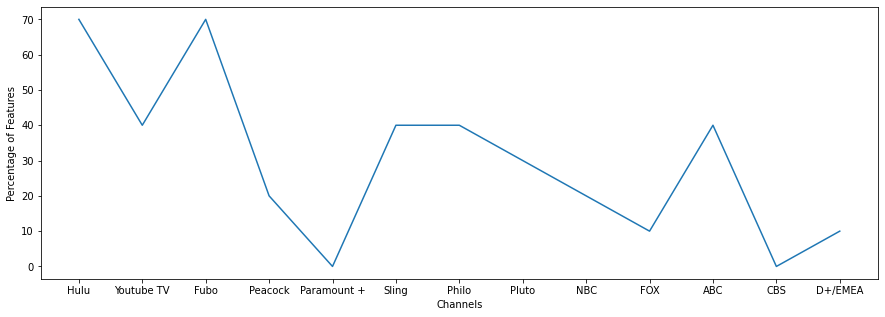

In [ ]:
plt.figure(figsize=(15, 5))
plt.xlabel("Channels")
plt.ylabel("Percentage of Features")
plt.plot(player_mean)
plt.savefig("Graph of Live Player Mean.png")
plt.show()

## EPG/Schedule

### Accessing the content file

In [ ]:
df_schedule = pd.read_csv('/content/drive/MyDrive/Stream_Analysis/Cleaned/C-EPG_Schedule.csv')
df_schedule

,Features,Hulu,Youtube TV,Fubo,Peacock,Paramount +,Sling,Philo,Pluto,NBC,FOX,ABC,CBS,Unnamed: 13,D+/EMEA
0,Day Selector: browse listings for 7 days in th...,True,True,True,False,False,True,False,False,False,True,True,False,NaN,True
1,Day Selector: browse listings for 7 days in th...,False,False,False,False,False,False,False,False,False,False,False,False,NaN,True
2,Thumbnail Preview,False,True,True,False,False,False,True,False,False,False,False,False,NaN,False
3,View schedule sorting by genres,True,False,True,False,False,True,False,True,False,False,False,False,NaN,False
4,"View schedule sorting by A-Z, recent, favorites",True,True,False,False,False,False,False,False,False,False,False,False,NaN,False
5,Series title (meta info),True,True,True,True,True,True,True,True,True,False,True,True,NaN,True
6,Episode title or S#E# (meta info),True,True,False,False,True,False,False,False,False,False,True,True,NaN,True
7,Short description (meta info),False,False,False,False,True,False,False,False,False,False,False,True,NaN,False
8,TV rating (meta info),False,True,False,False,False,False,False,False,True,False,True,False,NaN,False
9,Time left to the end (meta info),True,True,False,False,True,False,False,False,False,False,False,True,NaN,False


### Dropping Unnecessary columns

In [ ]:
df_schedule = df_schedule.drop(['Unnamed: 13'], axis='columns')
df_schedule

,Features,Hulu,Youtube TV,Fubo,Peacock,Paramount +,Sling,Philo,Pluto,NBC,FOX,ABC,CBS,D+/EMEA
0,Day Selector: browse listings for 7 days in th...,True,True,True,False,False,True,False,False,False,True,True,False,True
1,Day Selector: browse listings for 7 days in th...,False,False,False,False,False,False,False,False,False,False,False,False,True
2,Thumbnail Preview,False,True,True,False,False,False,True,False,False,False,False,False,False
3,View schedule sorting by genres,True,False,True,False,False,True,False,True,False,False,False,False,False
4,"View schedule sorting by A-Z, recent, favorites",True,True,False,False,False,False,False,False,False,False,False,False,False
5,Series title (meta info),True,True,True,True,True,True,True,True,True,False,True,True,True
6,Episode title or S#E# (meta info),True,True,False,False,True,False,False,False,False,False,True,True,True
7,Short description (meta info),False,False,False,False,True,False,False,False,False,False,False,True,False
8,TV rating (meta info),False,True,False,False,False,False,False,False,True,False,True,False,False
9,Time left to the end (meta info),True,True,False,False,True,False,False,False,False,False,False,True,False


### Checking the null values

In [ ]:
df_schedule.isnull().sum()

Features       0
Hulu           0
Youtube TV     0
Fubo           0
Peacock        0
Paramount +    0
Sling          0
Philo          0
Pluto          0
NBC            0
FOX            0
ABC            0
CBS            0
D+/EMEA        0
dtype: int64

### Mean values

In [ ]:
schedule_mean = df_schedule.mean()*100
print(schedule_mean)

Hulu           60.0
Youtube TV     70.0
Fubo           40.0
Peacock        10.0
Paramount +    40.0
Sling          30.0
Philo          20.0
Pluto          20.0
NBC            20.0
FOX            10.0
ABC            40.0
CBS            40.0
D+/EMEA        40.0
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


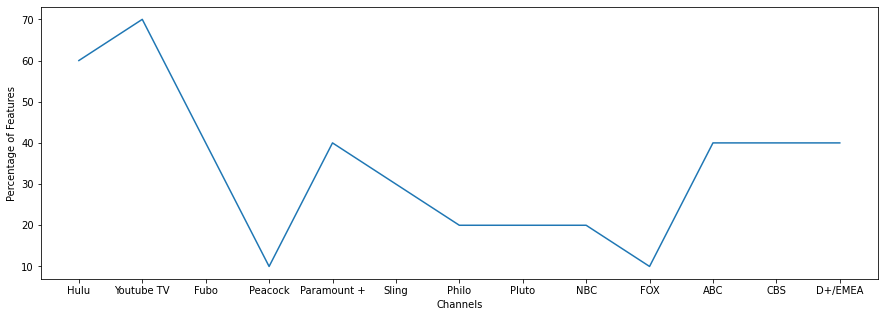

In [ ]:
plt.figure(figsize=(15, 5))
plt.xlabel("Channels")
plt.ylabel("Percentage of Features")
plt.plot(schedule_mean)
plt.savefig("Graph of EPG-Schedule Mean.png")
plt.show()

## Additional Content Options

### Accessing the content file

In [ ]:
df_additional = pd.read_csv('/content/drive/MyDrive/Stream_Analysis/Cleaned/C-Additional_Content_Options.csv')
df_additional

,Features,Hulu,Youtube TV,Fubo,Peacock,Paramount +,Sling,Philo,Pluto,NBC,FOX,ABC,CBS,Unnamed: 13,D+/EMEA
0,Link to show details/series info,True,True,True,False,False,True,True,True,False,True,True,False,NaN,False
1,Link to Network/channel landing,True,True,False,False,False,False,True,True,False,False,False,False,NaN,False
2,Start from the beginning,True,False,False,False,False,True,False,False,False,False,True,False,NaN,False
3,Recording Live (DVR),True,False,True,False,False,True,False,False,False,False,False,False,NaN,False
4,"Promo/Recommendation (e.g. upcoming this week,...",False,True,False,False,False,False,False,False,False,True,False,False,NaN,False
5,Add 'Live event' to my list,False,True,False,False,False,False,False,False,False,False,False,False,NaN,False
6,Recently Watched Channel history,False,True,False,False,False,False,False,False,False,False,False,False,NaN,False
7,"""Schedule info in Show details",False,True,False,False,False,False,False,False,False,False,False,False,NaN,False
8,Enable to navigate other channels within the p...,False,True,False,False,False,True,False,False,False,False,True,False,NaN,False
9,Up Next' info in the player,True,False,True,False,False,False,False,False,False,False,False,False,NaN,False


### Dropping the unnecessary columns

In [ ]:
df_additional = df_additional.drop(['Unnamed: 13'], axis='columns')
df_additional

,Features,Hulu,Youtube TV,Fubo,Peacock,Paramount +,Sling,Philo,Pluto,NBC,FOX,ABC,CBS,D+/EMEA
0,Link to show details/series info,True,True,True,False,False,True,True,True,False,True,True,False,False
1,Link to Network/channel landing,True,True,False,False,False,False,True,True,False,False,False,False,False
2,Start from the beginning,True,False,False,False,False,True,False,False,False,False,True,False,False
3,Recording Live (DVR),True,False,True,False,False,True,False,False,False,False,False,False,False
4,"Promo/Recommendation (e.g. upcoming this week,...",False,True,False,False,False,False,False,False,False,True,False,False,False
5,Add 'Live event' to my list,False,True,False,False,False,False,False,False,False,False,False,False,False
6,Recently Watched Channel history,False,True,False,False,False,False,False,False,False,False,False,False,False
7,"""Schedule info in Show details",False,True,False,False,False,False,False,False,False,False,False,False,False
8,Enable to navigate other channels within the p...,False,True,False,False,False,True,False,False,False,False,True,False,False
9,Up Next' info in the player,True,False,True,False,False,False,False,False,False,False,False,False,False


### Checking for null values

In [ ]:
df_additional.isnull().sum()

Features       0
Hulu           0
Youtube TV     0
Fubo           0
Peacock        0
Paramount +    0
Sling          0
Philo          0
Pluto          0
NBC            0
FOX            0
ABC            0
CBS            0
D+/EMEA        0
dtype: int64

### Deriving mean values of features of channels

In [ ]:
additional_mean = df_additional.mean()*100
print(additional_mean)

Hulu           50.0
Youtube TV     70.0
Fubo           30.0
Peacock         0.0
Paramount +     0.0
Sling          40.0
Philo          20.0
Pluto          20.0
NBC             0.0
FOX            20.0
ABC            30.0
CBS             0.0
D+/EMEA         0.0
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


### Plotting the mean value results

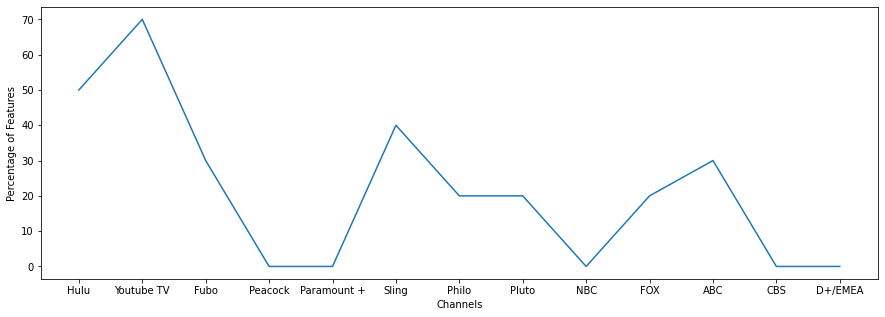

In [ ]:
plt.figure(figsize=(15, 5))
plt.xlabel("Channels")
plt.ylabel("Percentage of Features")
plt.plot(additional_mean)
plt.savefig("Graph of Additional Content Options Mean.png")
plt.show()

## Miscellaneous

### Accessing the content file

In [ ]:
df_misc = pd.read_csv('/content/drive/MyDrive/Stream_Analysis/Cleaned/C-Miscellaneous.csv')
df_misc

,Features,Hulu,Youtube TV,Fubo,Peacock,Paramount +,Sling,Philo,Pluto,NBC,FOX,ABC,CBS,Unnamed: 13,D+/EMEA
0,Favorite Channel,False,True,True,False,False,False,True,True,False,False,False,False,NaN,False
1,Add 'Upcoming' episode to My List,False,True,False,False,False,False,True,False,False,True,False,False,NaN,False
2,Virtual Channel,False,False,False,True,False,False,False,False,False,False,False,False,NaN,False
3,"NEW' label - indicating content type, 'premier'.",True,True,True,False,False,True,True,False,False,True,False,False,NaN,True
4,VOD' label - indicating content type,False,True,False,False,False,False,False,False,False,False,False,False,NaN,False
5,Upcoming live content surfacing on the details...,False,True,False,False,False,False,True,False,False,False,False,False,NaN,False
6,Watch Party,False,False,False,False,False,True,False,False,False,False,False,False,NaN,False
7,Sharing,False,False,False,False,False,False,False,True,True,False,False,True,NaN,False
8,Reminder (notify me),False,True,False,False,False,False,False,False,False,False,False,False,NaN,False
9,Enable browsing shows by schedule in channel,False,False,True,False,False,False,False,False,False,False,False,False,NaN,False


### Checking columns that have null values

In [ ]:
df_misc.isnull().sum()

Features        0
Hulu            0
Youtube TV      0
Fubo            0
Peacock         0
Paramount +     0
Sling           0
Philo           0
Pluto           0
NBC             0
FOX             0
ABC             0
CBS             0
Unnamed: 13    10
D+/EMEA         0
dtype: int64

### Dropping columns with null values

In [ ]:
df_misc = df_misc.drop(['Unnamed: 13'], axis='columns')
df_misc

,Features,Hulu,Youtube TV,Fubo,Peacock,Paramount +,Sling,Philo,Pluto,NBC,FOX,ABC,CBS,D+/EMEA
0,Favorite Channel,False,True,True,False,False,False,True,True,False,False,False,False,False
1,Add 'Upcoming' episode to My List,False,True,False,False,False,False,True,False,False,True,False,False,False
2,Virtual Channel,False,False,False,True,False,False,False,False,False,False,False,False,False
3,"NEW' label - indicating content type, 'premier'.",True,True,True,False,False,True,True,False,False,True,False,False,True
4,VOD' label - indicating content type,False,True,False,False,False,False,False,False,False,False,False,False,False
5,Upcoming live content surfacing on the details...,False,True,False,False,False,False,True,False,False,False,False,False,False
6,Watch Party,False,False,False,False,False,True,False,False,False,False,False,False,False
7,Sharing,False,False,False,False,False,False,False,True,True,False,False,True,False
8,Reminder (notify me),False,True,False,False,False,False,False,False,False,False,False,False,False
9,Enable browsing shows by schedule in channel,False,False,True,False,False,False,False,False,False,False,False,False,False


### Calculating the mean values for features of channels

In [ ]:
misc_mean = df_misc.mean()*100
print(misc_mean)

Hulu           10.0
Youtube TV     60.0
Fubo           30.0
Peacock        10.0
Paramount +     0.0
Sling          20.0
Philo          40.0
Pluto          20.0
NBC            10.0
FOX            20.0
ABC             0.0
CBS            10.0
D+/EMEA        10.0
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


### Plotting the results of mean values

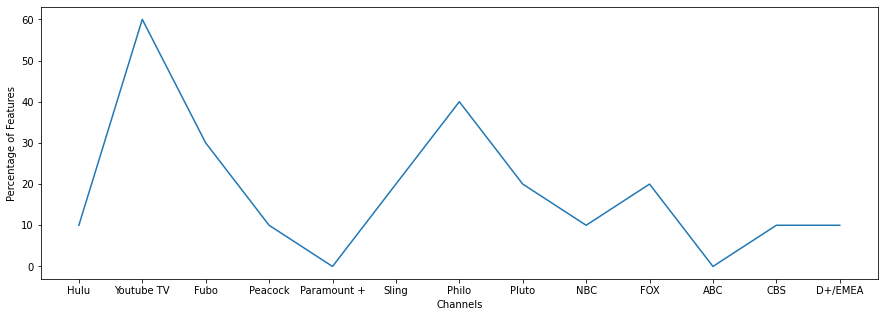

In [ ]:
plt.figure(figsize=(15, 5))
plt.xlabel("Channels")
plt.ylabel("Percentage of Features")
plt.plot(misc_mean)
plt.savefig("Graph of Miscellaneous Mean.png")
plt.show()

## Comparing the mean values of different features with channels

In [ ]:
data = pd.concat([player_mean, schedule_mean, additional_mean, misc_mean], axis=1)
data

,0,1,2,3
Hulu,70.0,60.0,50.0,10.0
Youtube TV,40.0,70.0,70.0,60.0
Fubo,70.0,40.0,30.0,30.0
Peacock,20.0,10.0,0.0,10.0
Paramount +,0.0,40.0,0.0,0.0
Sling,40.0,30.0,40.0,20.0
Philo,40.0,20.0,20.0,40.0
Pluto,30.0,20.0,20.0,20.0
NBC,20.0,20.0,0.0,10.0
FOX,10.0,10.0,20.0,20.0


### Renaming the "name" columns 

In [ ]:
data.rename(columns={0: 'Live Player', 1: 'EPG/Schedule', 2: 'Additional Content Options', 3: 'Miscellaneous'}, inplace=True)
data

,Live Player,EPG/Schedule,Additional Content Options,Miscellaneous
Hulu,70.0,60.0,50.0,10.0
Youtube TV,40.0,70.0,70.0,60.0
Fubo,70.0,40.0,30.0,30.0
Peacock,20.0,10.0,0.0,10.0
Paramount +,0.0,40.0,0.0,0.0
Sling,40.0,30.0,40.0,20.0
Philo,40.0,20.0,20.0,40.0
Pluto,30.0,20.0,20.0,20.0
NBC,20.0,20.0,0.0,10.0
FOX,10.0,10.0,20.0,20.0


### Plotting the graph of mean values of channels

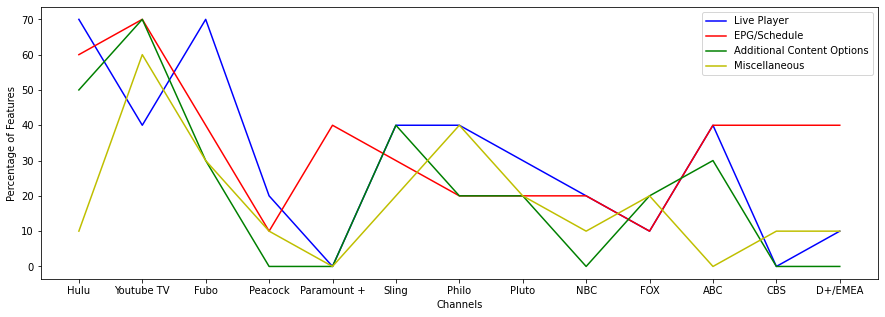

In [ ]:
plt.figure(figsize=(15, 5))
plt.xlabel("Channels")
plt.ylabel("Percentage of Features")
# plt.plot(data)
plt.plot(data['Live Player'], 'b-',label='Live Player')
plt.plot(data['EPG/Schedule'], 'r-',label='EPG/Schedule')
plt.plot(data['Additional Content Options'], 'g-',label='Additional Content Options')
plt.plot(data['Miscellaneous'], 'y-',label='Miscellaneous')
plt.legend(loc='upper right')
plt.savefig("Comparizon of all means.png")
plt.show()

In [ ]:
mean_line = data.mean()
mean_line

Live Player                   30.000000
EPG/Schedule                  33.846154
Additional Content Options    21.538462
Miscellaneous                 18.461538
dtype: float64

### Names of the channels

In [ ]:
channel_names = ['Hulu',	'Youtube TV',	'Fubo',	'Peacock',	'Paramount +',
                 'Sling',	'Philo',	'Pluto',	'NBC',	'FOX',	'ABC',	'CBS',	'D+/EMEA']

### Live Player Scatter Plot

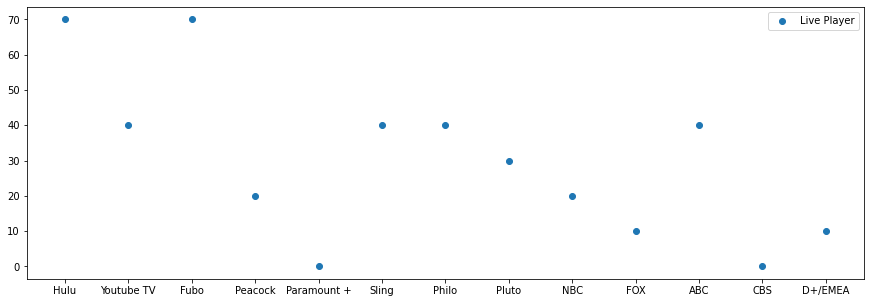

In [ ]:
plt.figure(figsize=(15, 5))
plt.scatter(channel_names, data['Live Player'], label='Live Player')
plt.legend()
plt.savefig("Scatter Plot Live Player.png")
plt.show()

### EPG/Schedule Scatter Plot

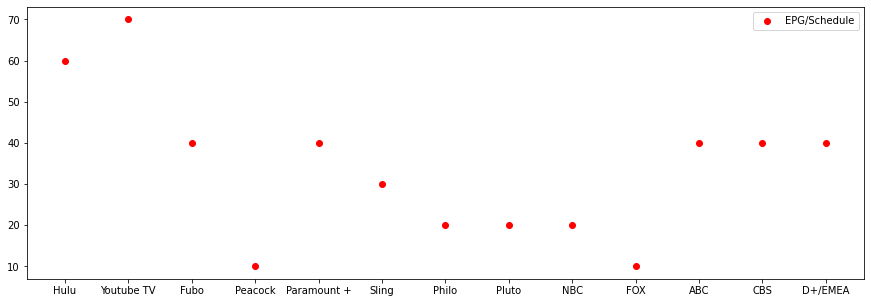

In [ ]:
plt.figure(figsize=(15, 5))
plt.scatter(channel_names, data['EPG/Schedule'], color='red', label='EPG/Schedule')
plt.legend()
plt.savefig("Scatter Plot EPG.png")
plt.show()

### Additional Content Options Scatter Plot

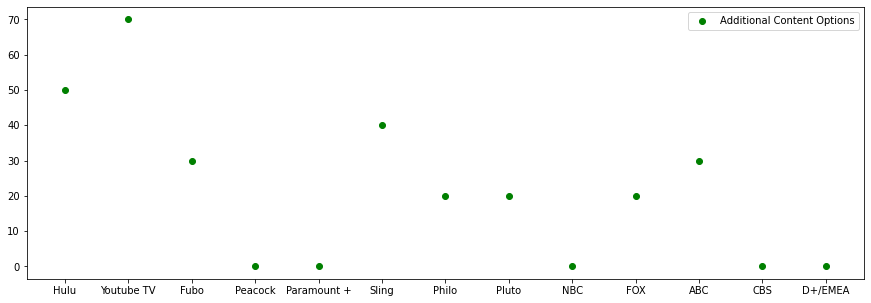

In [ ]:
plt.figure(figsize=(15, 5))
plt.scatter(channel_names, data['Additional Content Options'], color='green', label='Additional Content Options')
plt.legend()
plt.savefig("Scatter Plot Additional Content Options.png")
plt.show()

### Miscellaneous Scatter Plot

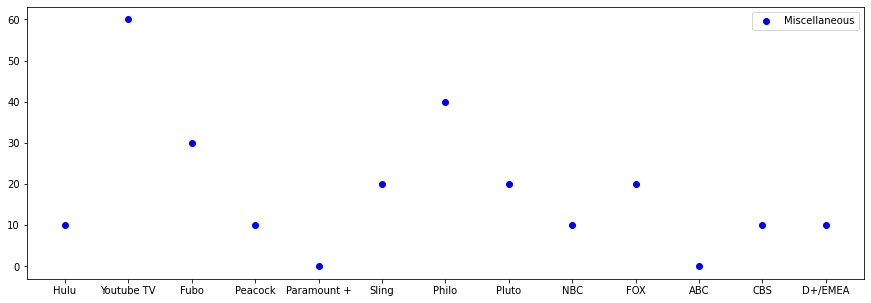

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(channel_names, misc_mean, color='blue', label='Miscellaneous')
plt.legend()
plt.savefig("Scatter Plot Miscellaneous.png")
plt.show()

### Comparizon of all mean values

Scatter Plot

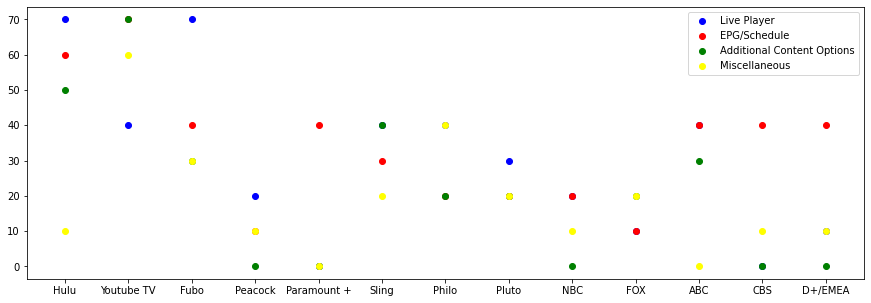

In [ ]:
plt.figure(figsize=(15, 5))
plt.scatter(channel_names, data['Live Player'], color='blue', label='Live Player')
plt.scatter(channel_names, data['EPG/Schedule'], color='red', label='EPG/Schedule')
plt.scatter(channel_names, data['Additional Content Options'], color='green', label='Additional Content Options')
plt.scatter(channel_names, data['Miscellaneous'], color='yellow', label='Miscellaneous')
plt.legend()
plt.savefig("Comparizon of all mean values Scatter without label.png")
plt.show()

With data point labels

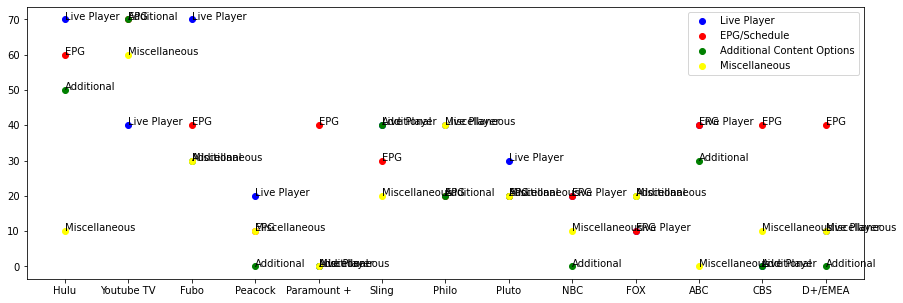

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.scatter(channel_names, data['Live Player'], color='blue', label='Live Player')
ax.scatter(channel_names, data['EPG/Schedule'], color='red', label='EPG/Schedule')
ax.scatter(channel_names, data['Additional Content Options'], color='green', label='Additional Content Options')
ax.scatter(channel_names, data['Miscellaneous'], color='yellow', label='Miscellaneous')

for i in range(13):
  ax.annotate('Live Player', (channel_names[i], player_mean[i]))

for i in range(13):
  ax.annotate('EPG', (channel_names[i], schedule_mean[i]))

for i in range(13):
  ax.annotate('Additional', (channel_names[i], additional_mean[i]))

for i in range(13):
  ax.annotate('Miscellaneous', (channel_names[i], misc_mean[i]))

ax.legend()
plt.savefig("Comparizon of all mean values Scatter with labels.png")
plt.show()

### Average Mean of all channels

In [ ]:
avg_mean = [data.mean().mean()]
avg_mean

for i in range(12):
  avg_mean.append(avg_mean[0])
avg_mean

[25.96153846153846,
 25.96153846153846,
 25.96153846153846,
 25.96153846153846,
 25.96153846153846,
 25.96153846153846,
 25.96153846153846,
 25.96153846153846,
 25.96153846153846,
 25.96153846153846,
 25.96153846153846,
 25.96153846153846,
 25.96153846153846]

### Average mean scatter plot

Without labels

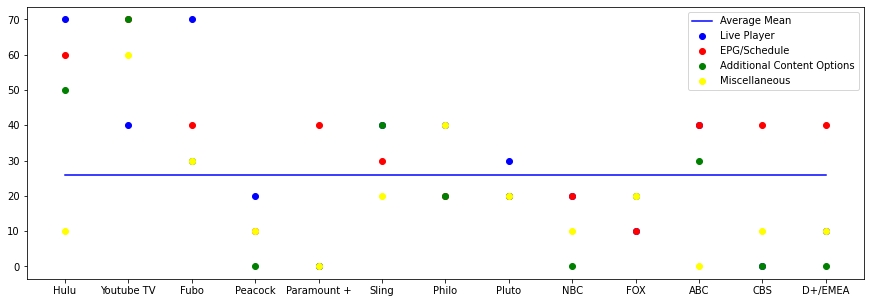

In [ ]:
plt.figure(figsize=(15, 5))
plt.scatter(channel_names, data['Live Player'], color='blue', label='Live Player')
plt.scatter(channel_names, data['EPG/Schedule'], color='red', label='EPG/Schedule')
plt.scatter(channel_names, data['Additional Content Options'], color='green', label='Additional Content Options')
plt.scatter(channel_names, data['Miscellaneous'], color='yellow', label='Miscellaneous')
plt.plot(channel_names, avg_mean, color='blue', label='Average Mean')
plt.legend()
plt.savefig("Comparizon of all mean values Scatter with average 0.png")
plt.show()

With data point labels

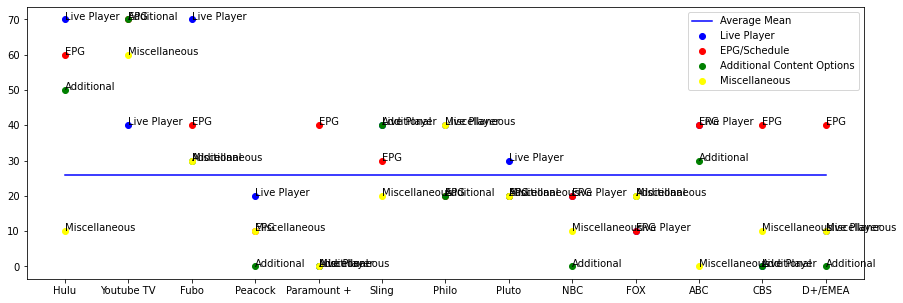

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.scatter(channel_names, data['Live Player'], color='blue', label='Live Player')
ax.scatter(channel_names, data['EPG/Schedule'], color='red', label='EPG/Schedule')
ax.scatter(channel_names, data['Additional Content Options'], color='green', label='Additional Content Options')
ax.scatter(channel_names, data['Miscellaneous'], color='yellow', label='Miscellaneous')

for i in range(13):
  ax.annotate('Live Player', (channel_names[i], player_mean[i]))

for i in range(13):
  ax.annotate('EPG', (channel_names[i], schedule_mean[i]))

for i in range(13):
  ax.annotate('Additional', (channel_names[i], additional_mean[i]))

for i in range(13):
  ax.annotate('Miscellaneous', (channel_names[i], misc_mean[i]))

ax.plot(channel_names, avg_mean, color='blue', label='Average Mean')
ax.legend()
plt.savefig("Comparizon of all mean values Scatter with average 1.png")
plt.show()

### Stacked Bar Chart Plotting

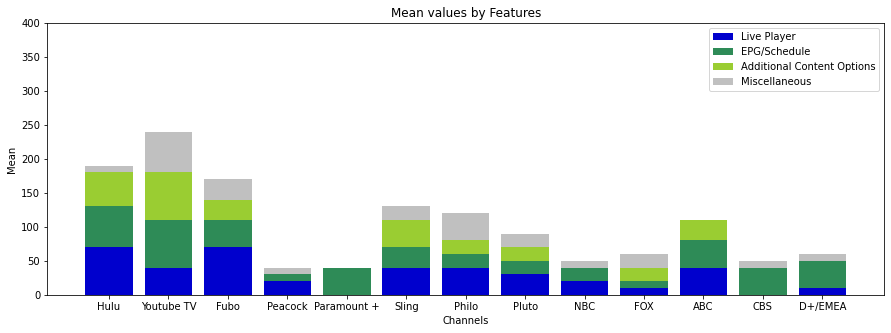

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Assign Data
x = channel_names
y1 = data['Live Player']
y2 = data['EPG/Schedule']
y3 = data['Additional Content Options']
y4 = data['Miscellaneous']

# plot bars in stack manner
plt.figure(figsize=(15, 5))
plt.ylim(0, 400)
plt.bar(x, y1, color='mediumblue', label='Live Player')
plt.bar(x, y2, bottom=y1, color='seagreen')
plt.bar(x, y3, bottom=y1+y2, color='yellowgreen')
plt.bar(x, y4, bottom=y1+y2+y3, color='silver')
plt.xlabel("Channels")
plt.ylabel("Mean")
plt.legend(['Live Player', 'EPG/Schedule', 'Additional Content Options', 'Miscellaneous'])
plt.title("Mean values by Features")
plt.savefig("Stacked Bar Chart 0.png")
plt.show()